In [1]:
# Standard imports for pandas and sklearn sample datasets
import pandas as pd
from sklearn import datasets
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
# Load the iris data
df = pd.read_csv('data/agaricus-lepiota (1).data', delimiter=',')


# A summary of the data
df.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


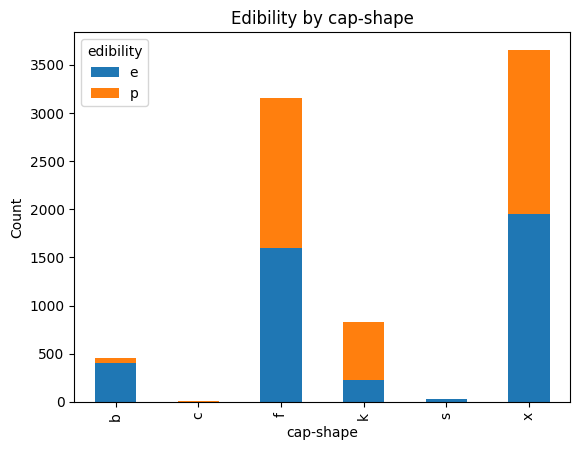

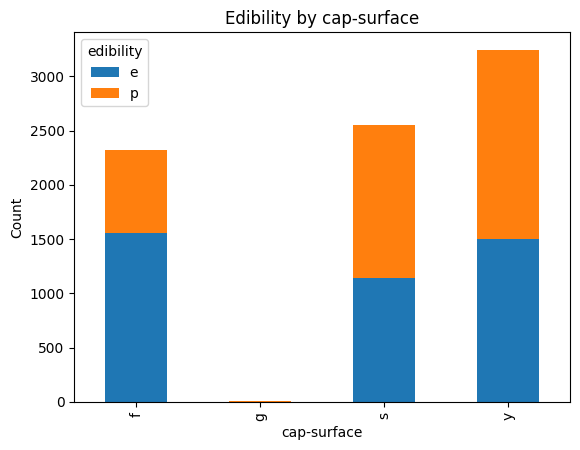

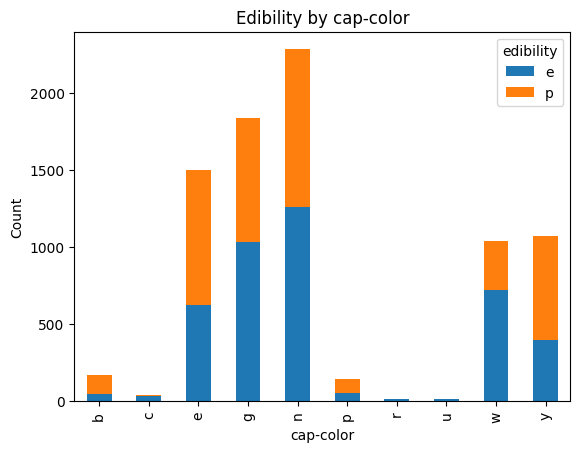

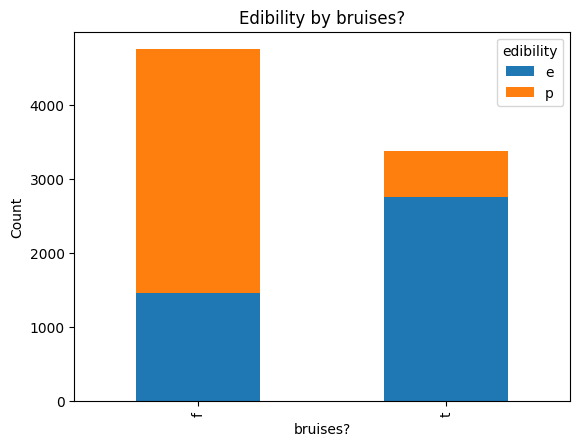

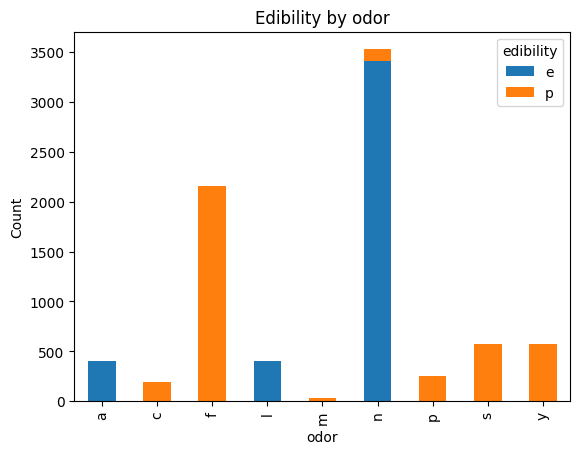

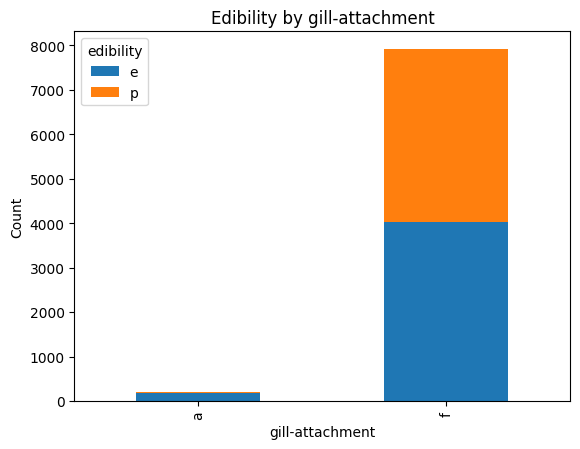

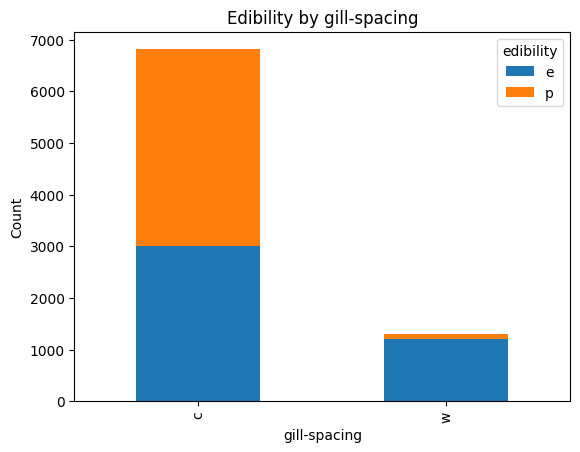

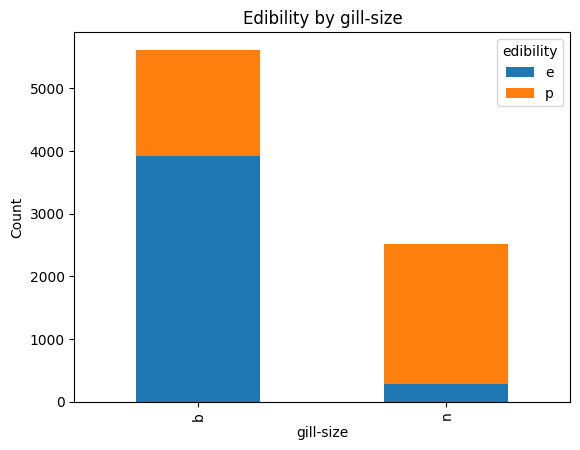

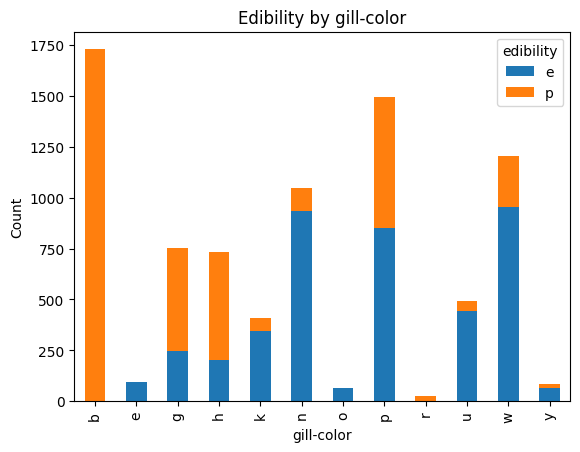

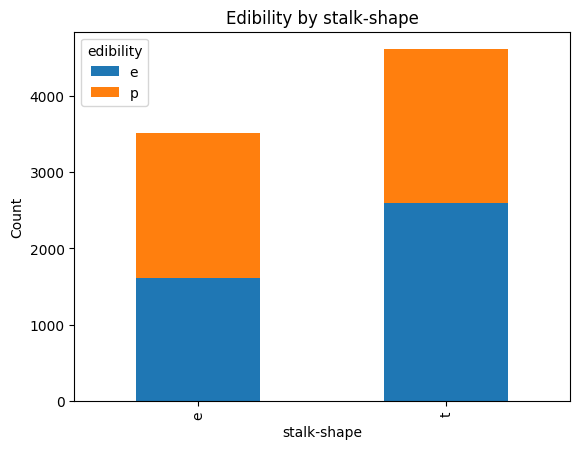

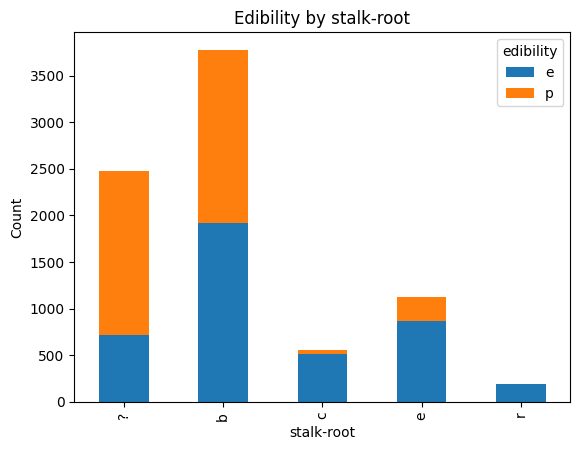

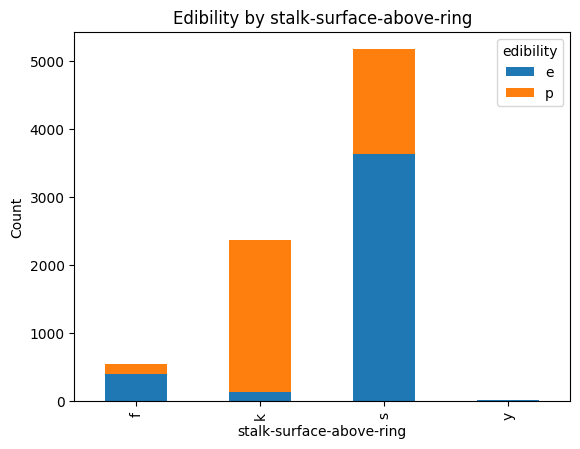

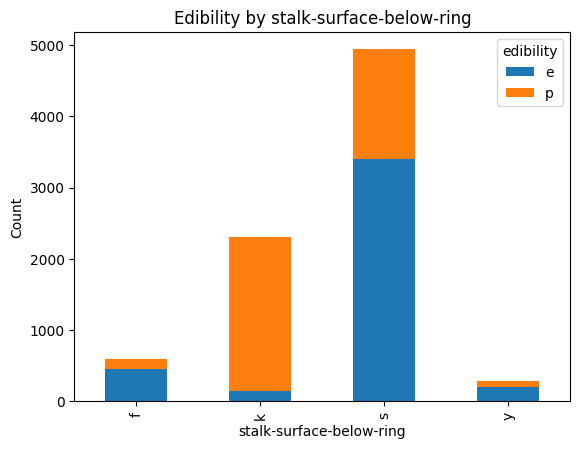

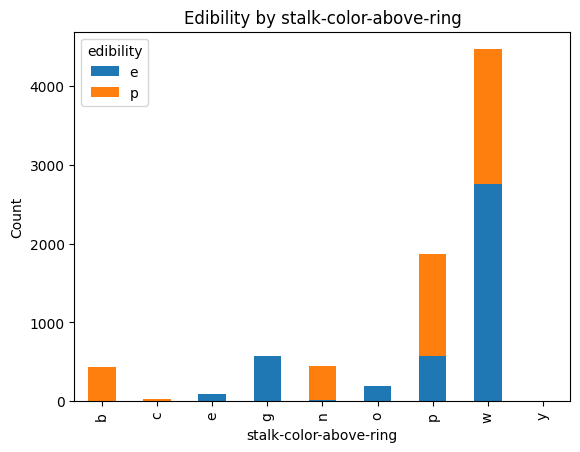

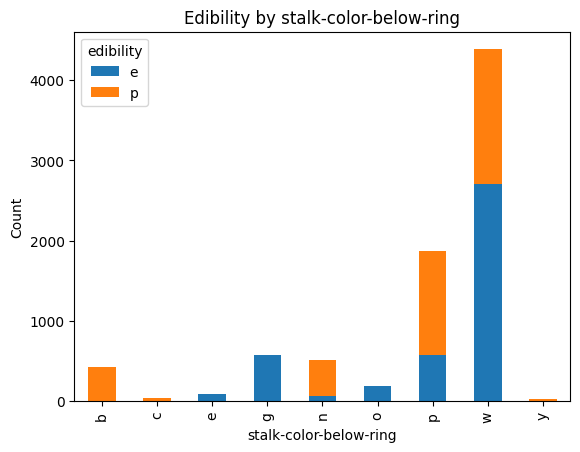

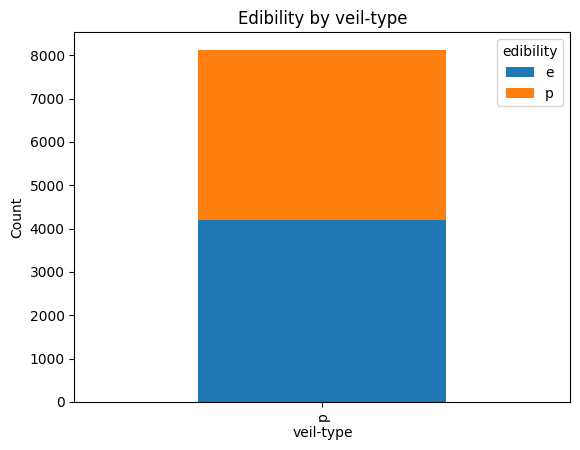

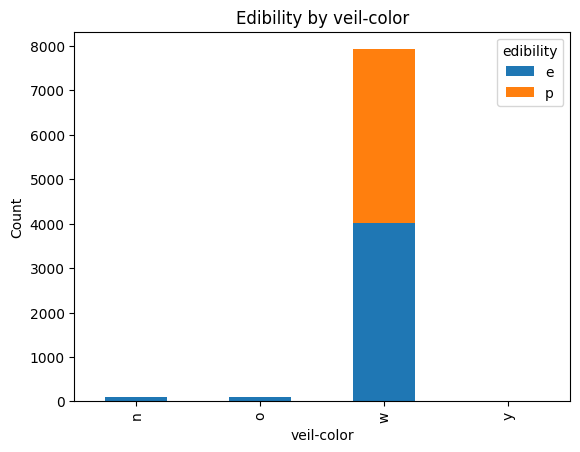

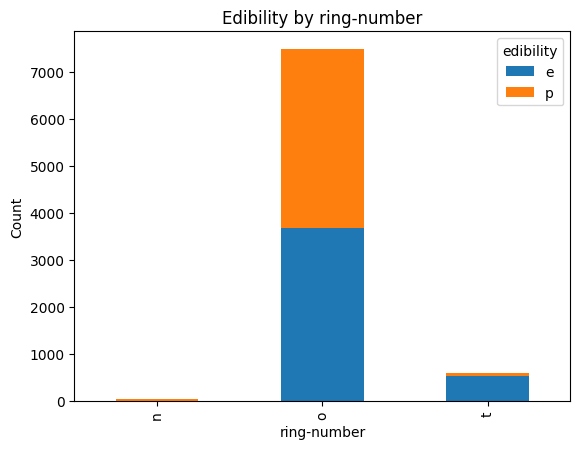

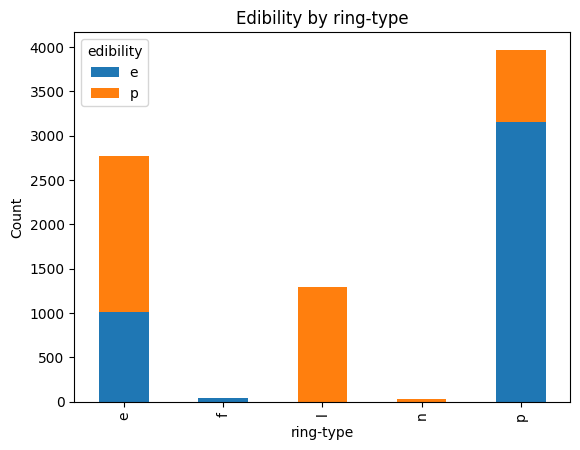

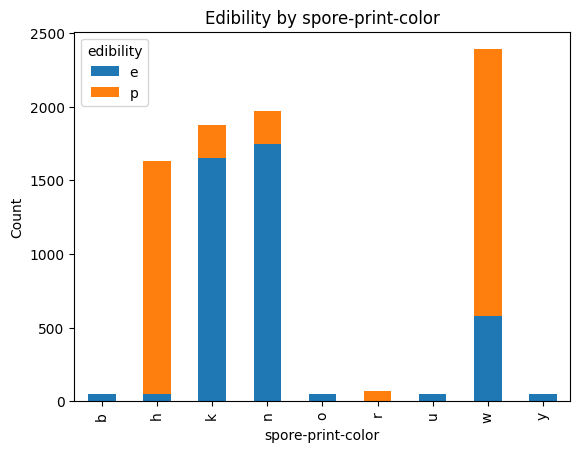

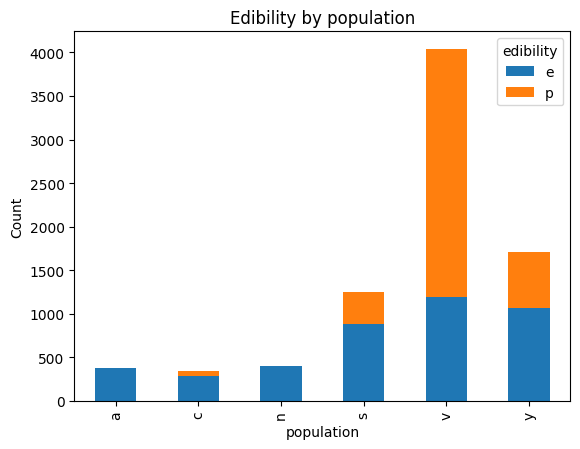

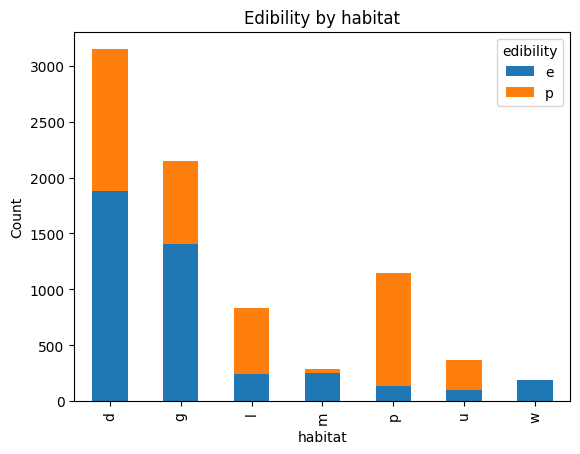

In [2]:
features = df.columns.drop('edibility')  # Remove 'edibility' from the list of features

# Loop through each feature and create a bar plot
for feature in features:
    pd.crosstab(df[feature], df['edibility']).plot(kind='bar', stacked=True)
    plt.title(f'Edibility by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


In [3]:
#convert to dummies
feature_cols = df.columns.drop('edibility')
df_dummies = pd.get_dummies(df, columns=feature_cols)
edibility = df['edibility']
final_df = pd.concat([edibility, df_dummies.drop('edibility', axis=1)], axis=1)
final_df.describe()

,edibility,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,e,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,4208,7672,8120,4972,7296,8092,4468,5804,8120,5568,...,6876,4084,6412,4976,5976,7292,7832,6980,7756,7932


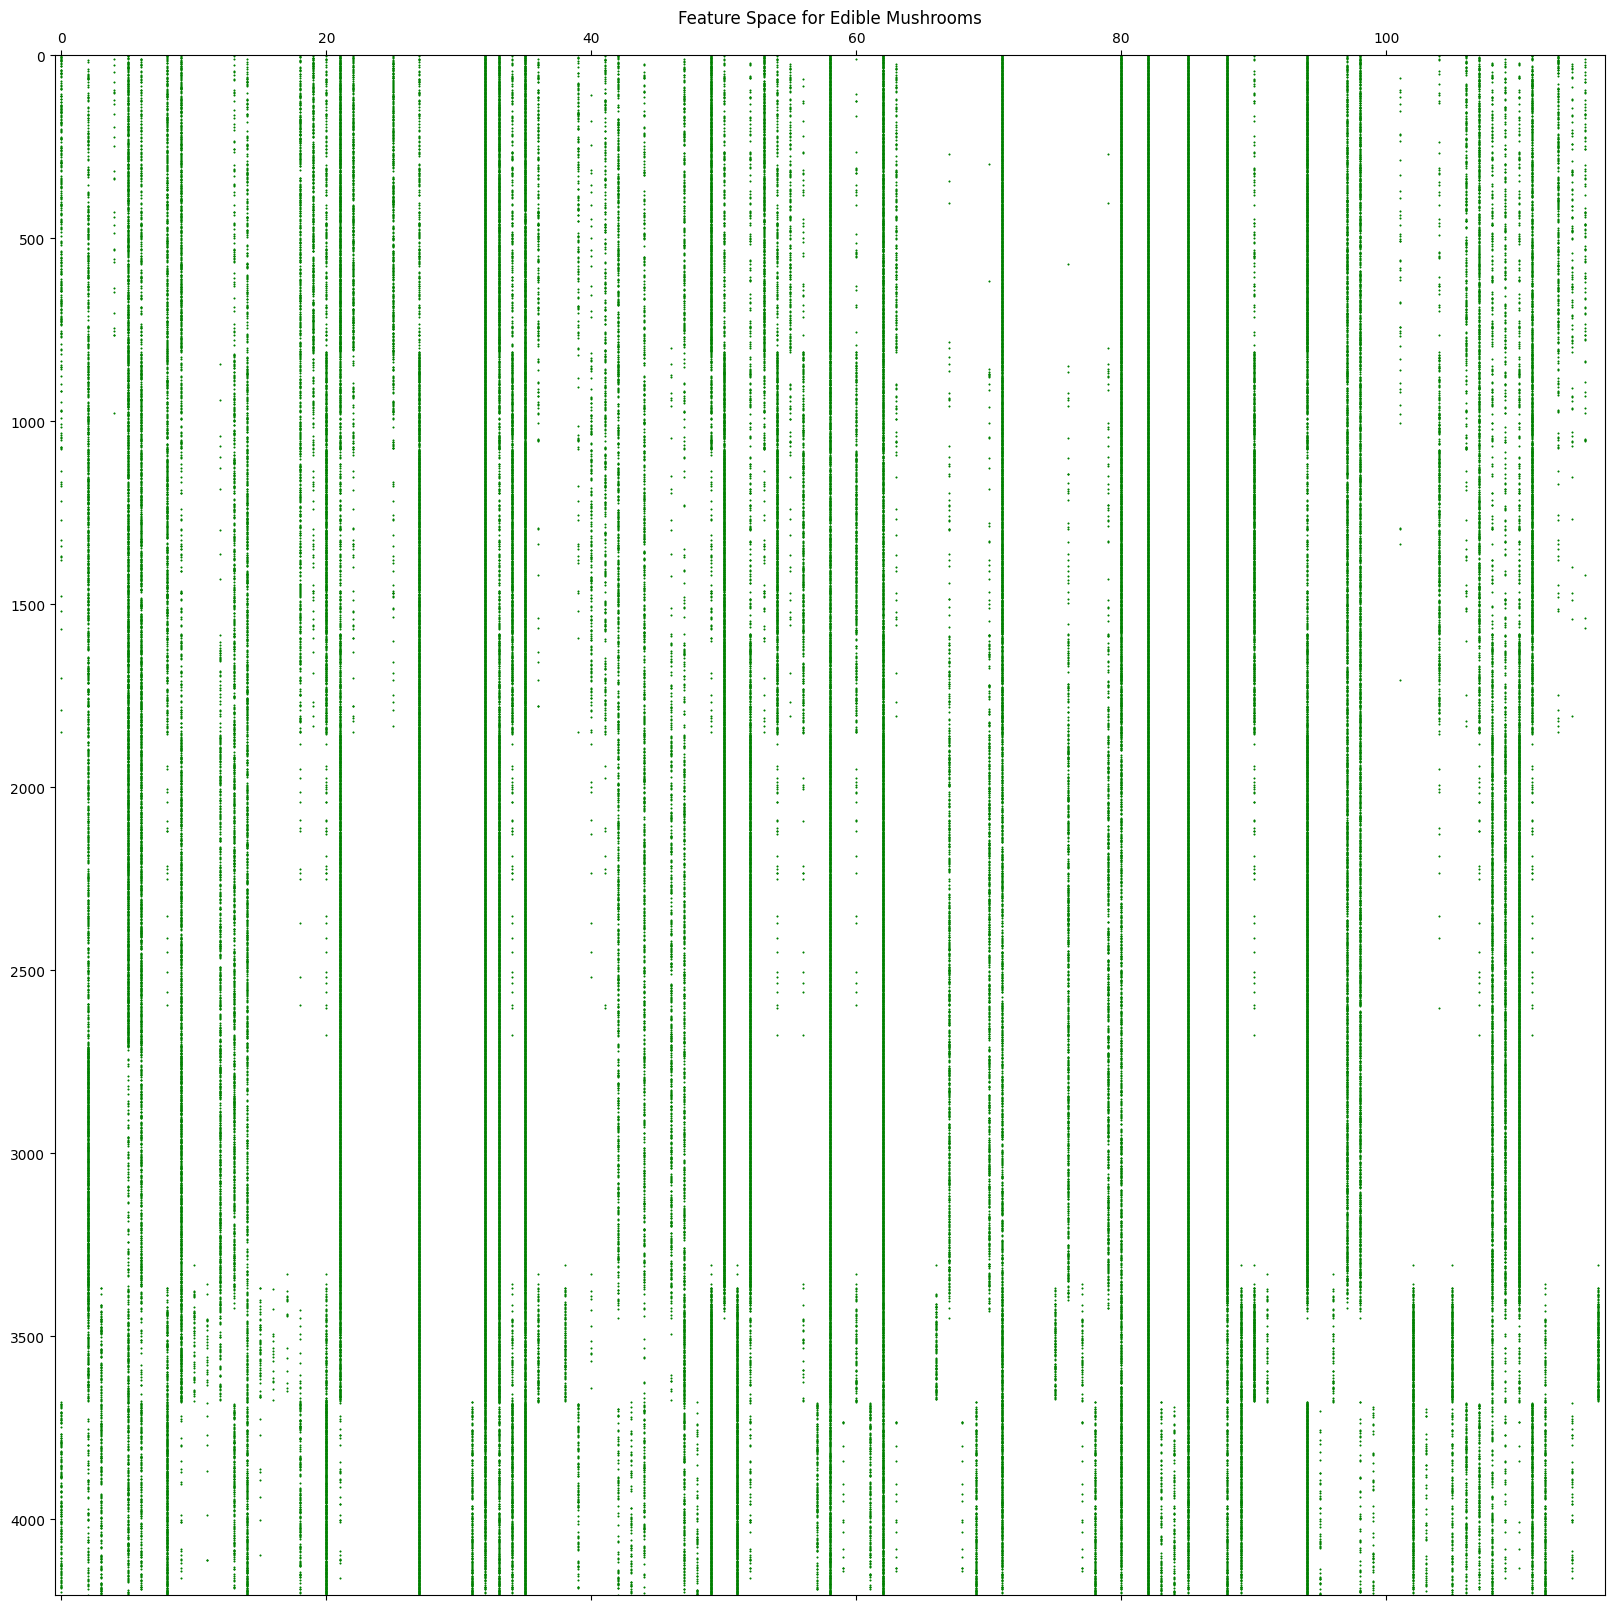

In [12]:
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# Filter dataframe for edible mushrooms
edible_df = final_df[final_df['edibility'] == 'e']

# Drop the 'edibility' column to get only features
edible_features = edible_df.drop(columns=['edibility'])

# Convert the DataFrame to a sparse matrix
sparse_matrix = csr_matrix(edible_features.values)

# Create a plot
fig, ax = plt.subplots(figsize=(20, 20))
ax.spy(sparse_matrix, markersize=0.5, aspect='auto',markerfacecolor='green', markeredgecolor='green')
ax.set_title('Feature Space for Edible Mushrooms')
plt.show()


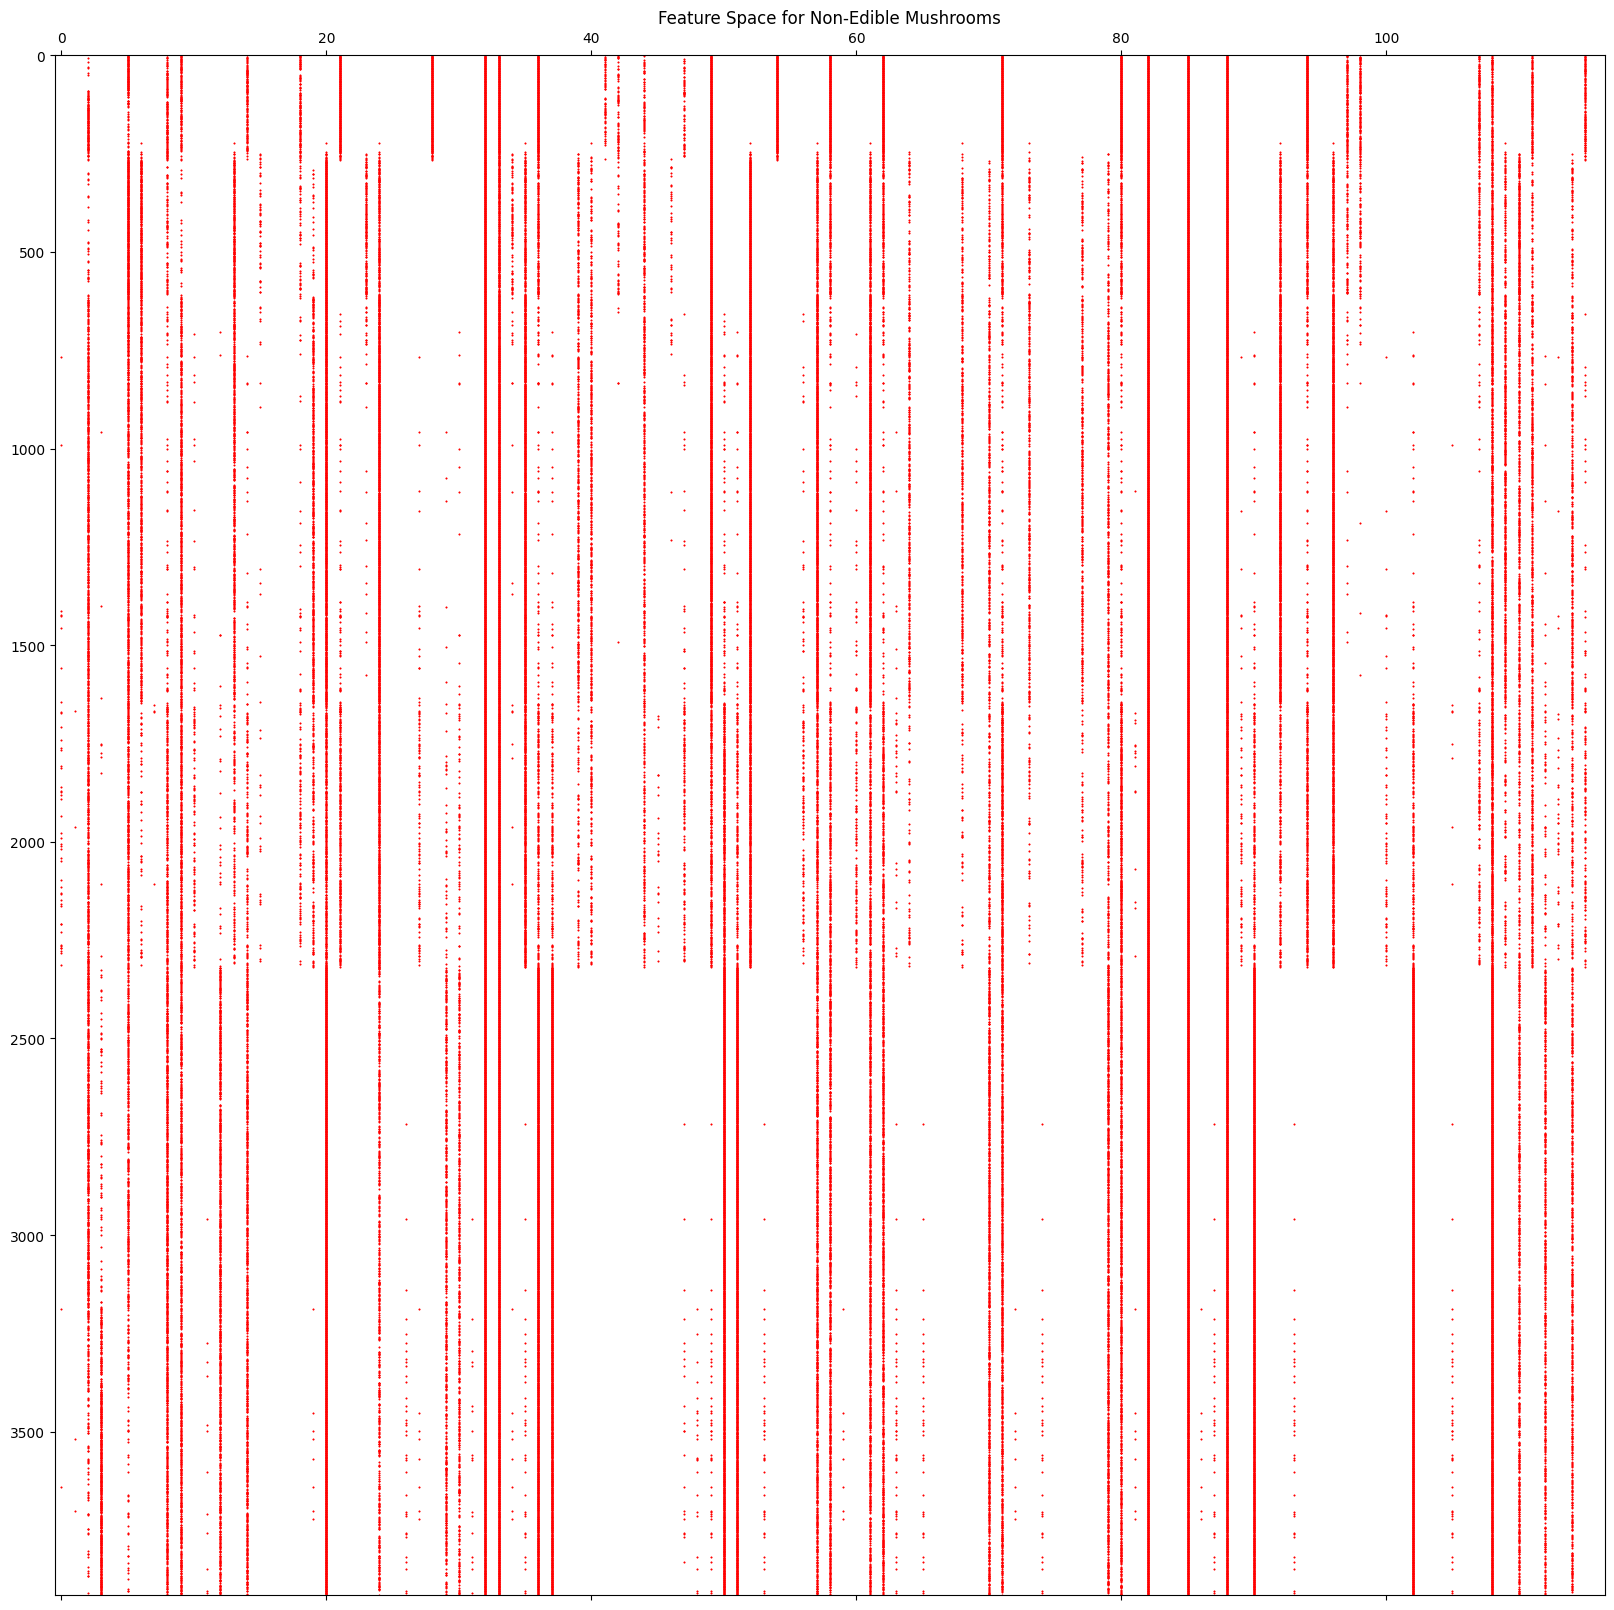

In [11]:
# Filter dataframe for non-edible mushrooms
non_edible_df = final_df[final_df['edibility'] == 'p']

# Drop the 'edibility' column to get only features
non_edible_features = non_edible_df.drop(columns=['edibility'])

# Convert the DataFrame to a sparse matrix
sparse_matrix = csr_matrix(non_edible_features.values)

# Create a plot
fig, ax = plt.subplots(figsize=(20, 20))
ax.spy(sparse_matrix, markersize=0.5, aspect='auto',markerfacecolor='red', markeredgecolor='red')
ax.set_title('Feature Space for Non-Edible Mushrooms')
plt.show()


In [9]:
final_df.describe()

,edibility,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,e,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,4208,7672,8120,4972,7296,8092,4468,5804,8120,5568,...,6876,4084,6412,4976,5976,7292,7832,6980,7756,7932


Plotting:   0%|          | 0/8124 [00:00<?, ?it/s]

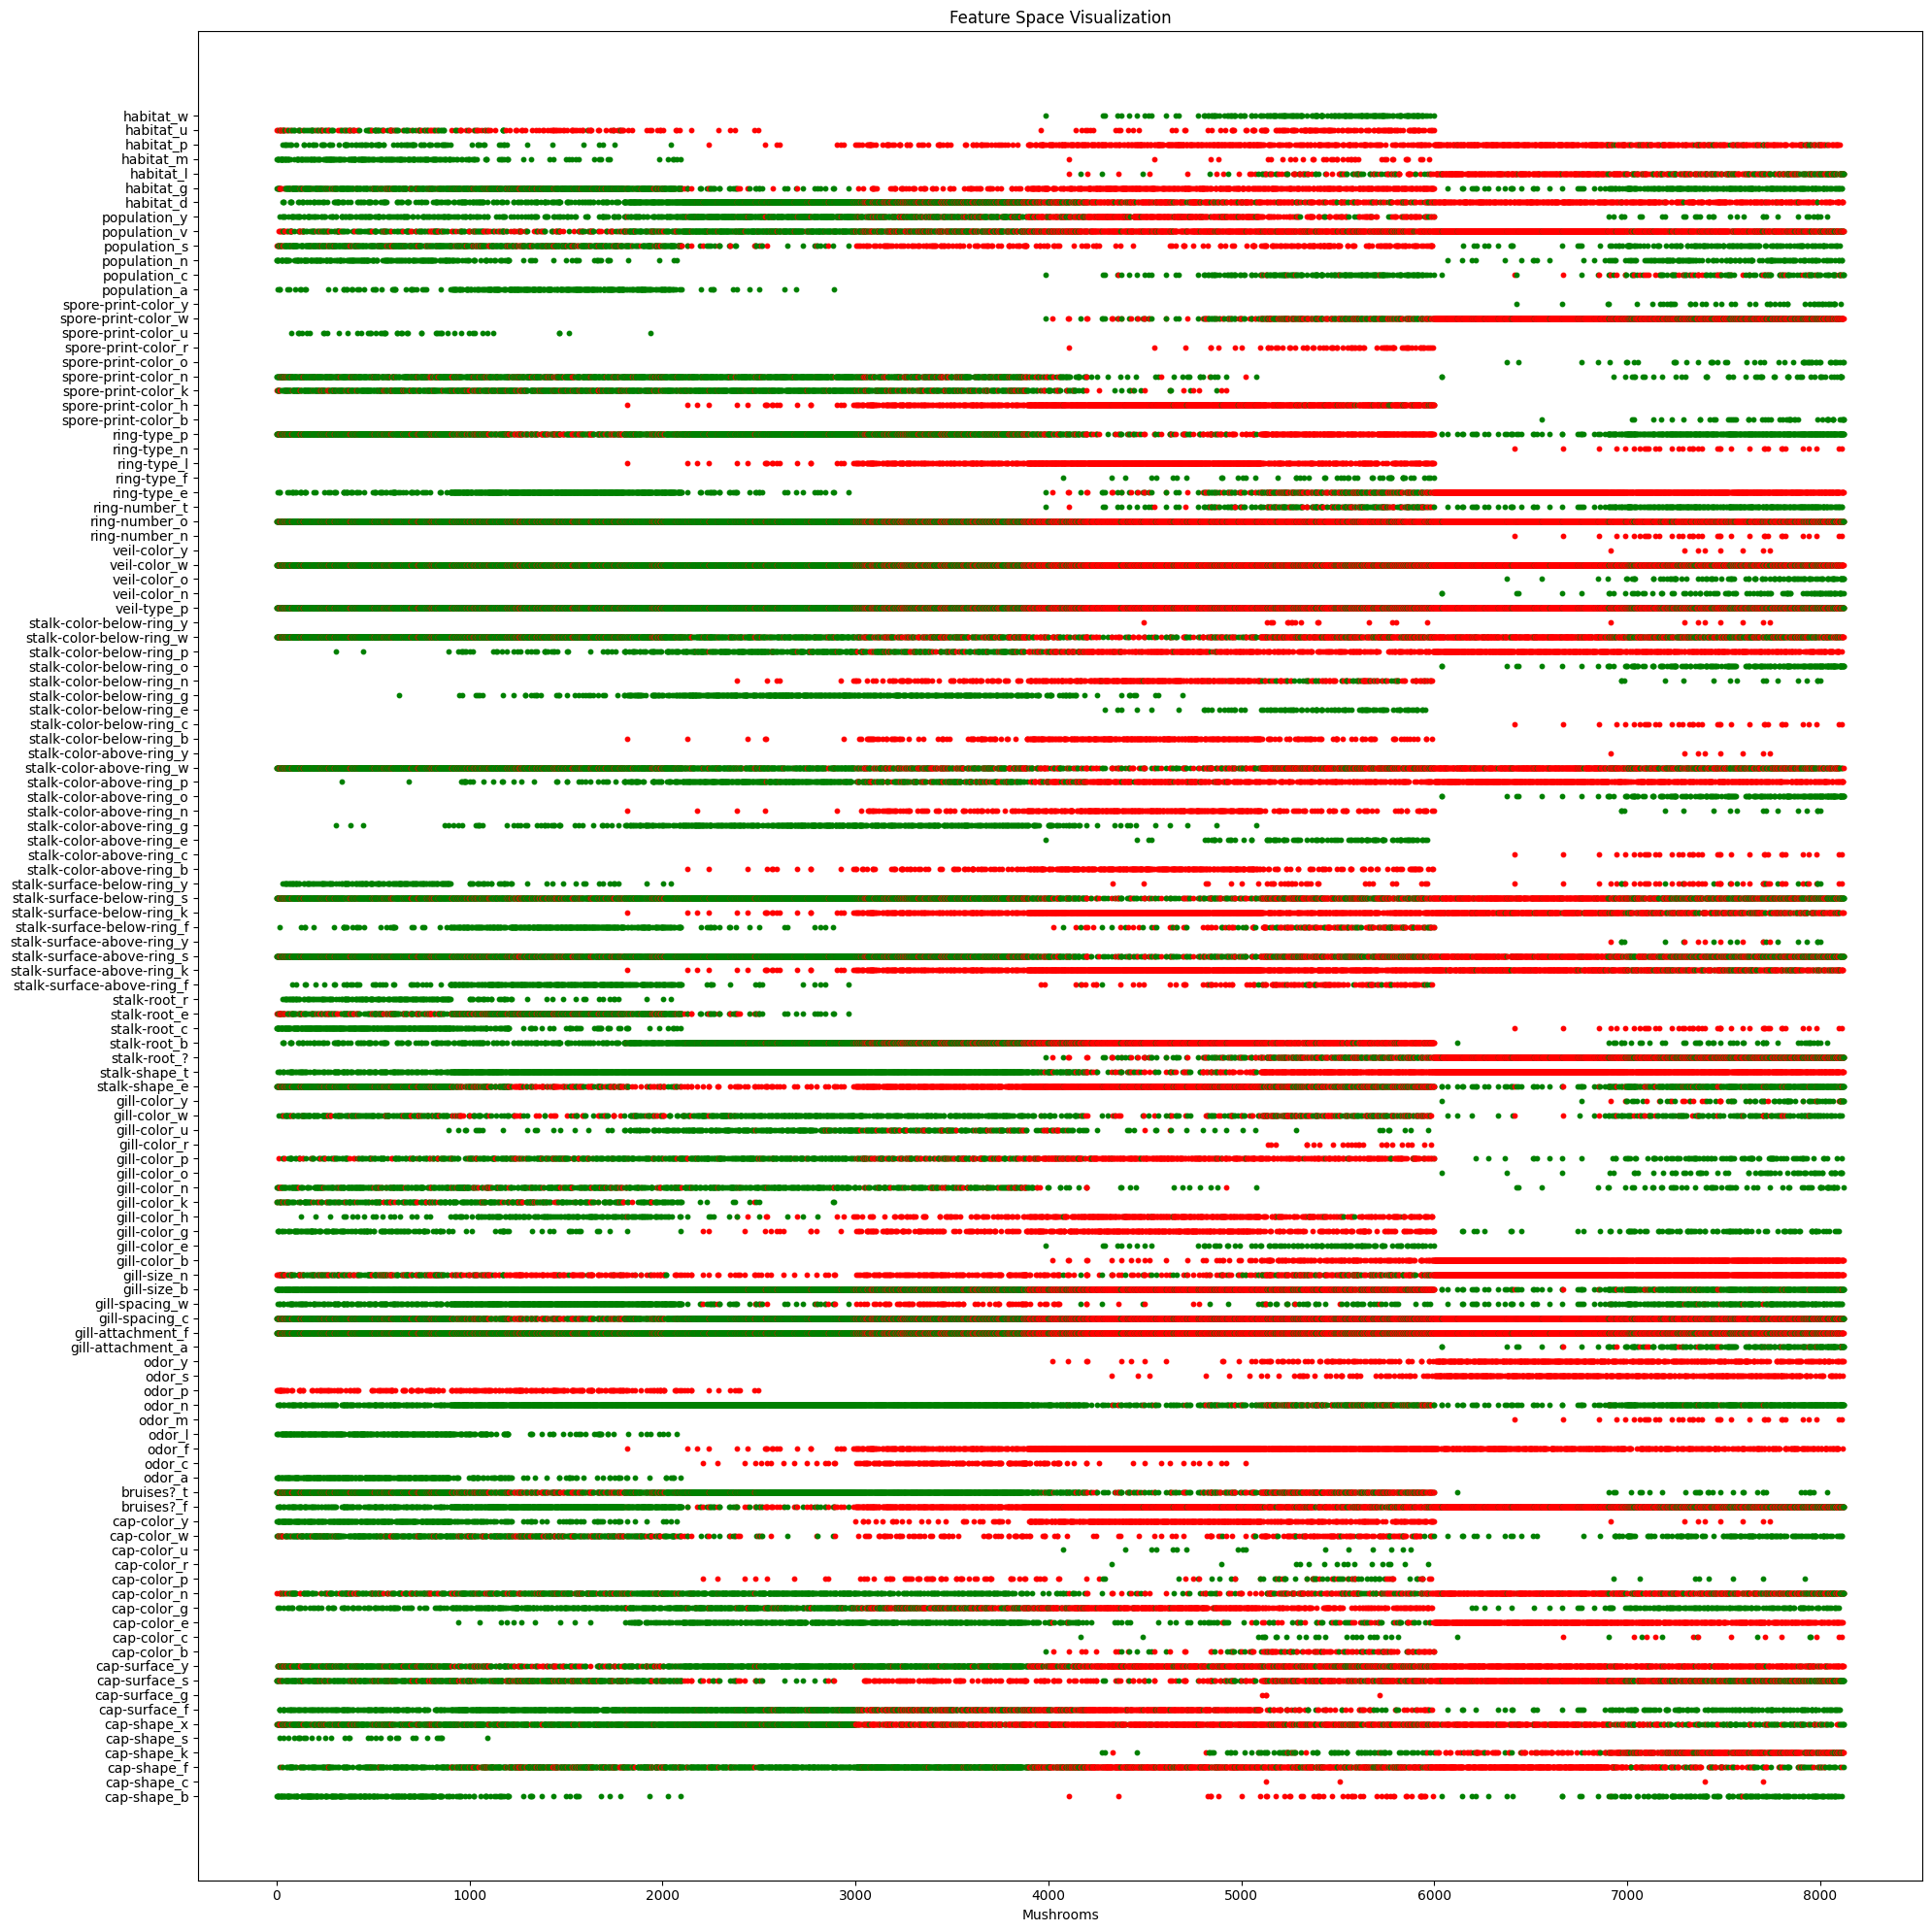

In [13]:
from tqdm.notebook import tqdm

data_np = final_df.to_numpy()
# Separate edibility column and features
edibility_column = data_np[:, 0]
feature_matrix = data_np[:, 1:]

# Create the plot
fig, ax = plt.subplots(figsize=(20, 20))

# Loop through each mushroom
for i in tqdm(range(feature_matrix.shape[0]), desc='Plotting'):
    edibility = edibility_column[i]
    color = 'g' if edibility == 'e' else 'r'

    # Find indices of '1' in the feature row
    non_zero_indices = np.where(feature_matrix[i] == 1)[0]

    # Plot these features for the current mushroom
    ax.scatter([i] * len(non_zero_indices), non_zero_indices, c=color, s=10)

# Set axis labels and title
ax.set_yticks(range(len(final_df.columns[1:])))
ax.set_yticklabels(final_df.columns[1:])
ax.set_xlabel('Mushrooms')
ax.set_title('Feature Space Visualization')

plt.tight_layout()
plt.show()